# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [4]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: C:\Users\dmitr\Downloads\train.csv

  0%|          | 0.00/664k [00:00<?, ?B/s]
 79%|#######8  | 524k/664k [00:00<00:00, 2.71MB/s]
100%|##########| 664k/664k [00:00<00:00, 3.05MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: C:\Users\dmitr\Downloads\test.csv

  0%|          | 0.00/218k [00:00<?, ?B/s]
100%|##########| 218k/218k [00:00<00:00, 2.92MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: C:\Users\dmitr\Downloads\submission.csv

  0%|          | 0.00/14.7k [00:00<?, ?B/s]
100%|##########| 14.7k/14.7k [00:00<00:00, 10.1MB/s]


In [5]:
data = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')


полюбуемся на часть данных

In [6]:
data.head(5)

ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0            55            19.50    1026.35    Male                0   
1            72            25.85     1872.2    Male                0   
2             1            75.90       75.9    Male                0   
3            32            79.30       2570  Female                1   
4            60           115.25    6758.45  Female                0   

  HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0        Yes      Yes             Yes                      No   
1        Yes       No             Yes                     Yes   
2         No       No             Yes                      No   
3        Yes       No             Yes                     Yes   
4        Yes      Yes             Yes                     Yes   

  HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
0                 No      No internet service  No internet service   
1                 No      No internet service  No internet service   
2        Fiber optic                       No                   No   
3        Fiber optic                       No                   No   
4        Fiber optic                      Yes                  Yes   

   HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
0  No internet service  No internet service  No internet service   
1  No internet service  No internet service  No internet service   
2                   No                  Yes                   No   
3                  Yes                   No                   No   
4                  Yes                  Yes                  Yes   

  HasMovieSubscription HasContractPhone IsBillingPaperless  \
0  No internet service         One year                 No   
1  No internet service         Two year                 No   
2                   No   Month-to-month                Yes   
3                   No   Month-to-month                 No   
4                  Yes         Two year                 No   

             PaymentMethod  Churn  
0             Mailed check      0  
1  Credit card (automatic)      0  
2         Electronic check      1  
3             Mailed check      0  
4  Credit card (automatic)      0

In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

Приглядимся к типом данных

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

TotalSpent является объектом. Это может быть стринга или что либо ещё. Попытаемся перевести в float64, и если не получится, то приравнять элемент к nan

In [9]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')

Заполним nan для числовых переменных. Для ClientPeriod и MonthlySpending берём среднестатистические значения, для TotalSpent считаем перемножая период с платёж (на самом деле ClientPeriod и MonthlySpending nan'ов нет в этом датасете, но давайте напишем универсальный код, просто потому что можем).

In [10]:
data['ClientPeriod'].fillna(data['ClientPeriod'].median(), inplace=True)
data['MonthlySpending'].fillna(data['MonthlySpending'].median(), inplace=True)
data['TotalSpent'] = data['TotalSpent'].fillna(data['ClientPeriod'] * data['MonthlySpending'])


Можно было так же поискать и заменить nan для категориальных признаков, так же привести некоторые категориальные признаки к bool, но пока польза сомнительна, по-этому скипнем этот момент. Но данными ещё раз полюбуемся, на этот раз в конце.

In [11]:
data.tail(5)

ClientPeriod  MonthlySpending  TotalSpent     Sex  IsSeniorCitizen  \
5277             3            30.40       82.15    Male                0   
5278            50            44.45     2188.45    Male                0   
5279             1            55.05       55.05    Male                0   
5280            29            76.00     2215.25  Female                0   
5281            19            75.90     1375.60  Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
5277         No       No              No        No phone service   
5278        Yes       No              No        No phone service   
5279         No       No             Yes                      No   
5280         No       No             Yes                     Yes   
5281         No      Yes             Yes                     Yes   

     HasInternetService HasOnlineSecurityService HasOnlineBackup  \
5277                DSL                       No              No   
5278                DSL                      Yes              No   
5279                DSL                       No              No   
5280        Fiber optic                       No              No   
5281                DSL                      Yes             Yes   

     HasDeviceProtection HasTechSupportAccess HasOnlineTV  \
5277                  No                  Yes          No   
5278                  No                  Yes         Yes   
5279                 Yes                  Yes          No   
5280                  No                   No          No   
5281                  No                  Yes         Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
5277                   No   Month-to-month                 No   
5278                   No         One year                Yes   
5279                   No   Month-to-month                 No   
5280                   No   Month-to-month                Yes   
5281                   No   Month-to-month                Yes   

                  PaymentMethod  Churn  
5277           Electronic check      0  
5278  Bank transfer (automatic)      0  
5279               Mailed check      0  
5280    Credit card (automatic)      0  
5281               Mailed check      0

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

Для начала я бы удалил дупликаты

In [12]:
data = data.drop_duplicates()

Начнём с простого и посмотри на распределение целевой переменной и видем, что она не сбалансирована

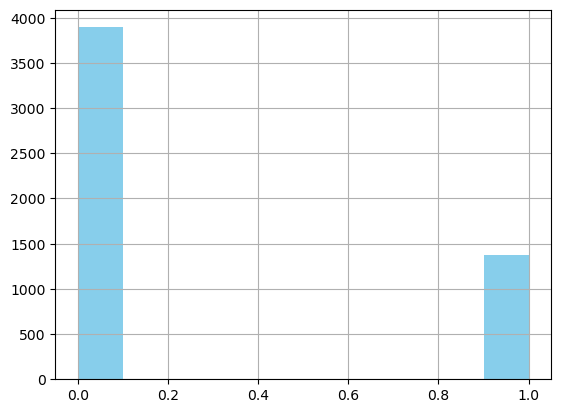

In [13]:
data['Churn'].hist(color = "skyblue");

Визуализируем числовые признаки

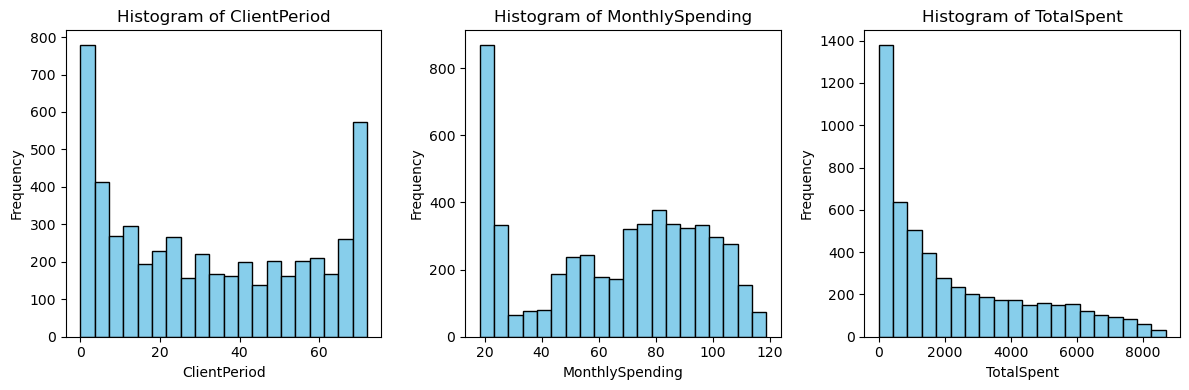

In [14]:
num_cols = ['ClientPeriod', 'MonthlySpending', 'TotalSpent']

plt.figure(figsize=(12, 4))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    plt.hist(data[col], bins=20, edgecolor='k', color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Категориальные признаки

In [15]:
for col in cat_cols:
    print(f"Value counts for column '{col}':")
    print(data[col].value_counts())
    print("\n")

Value counts for column 'Sex':
Male      2647
Female    2621
Name: Sex, dtype: int64


Value counts for column 'IsSeniorCitizen':
0    4427
1     841
Name: IsSeniorCitizen, dtype: int64


Value counts for column 'HasPartner':
No     2691
Yes    2577
Name: HasPartner, dtype: int64


Value counts for column 'HasChild':
No     3662
Yes    1606
Name: HasChild, dtype: int64


Value counts for column 'HasPhoneService':
Yes    4747
No      521
Name: HasPhoneService, dtype: int64


Value counts for column 'HasMultiplePhoneNumbers':
No                  2497
Yes                 2250
No phone service     521
Name: HasMultiplePhoneNumbers, dtype: int64


Value counts for column 'HasInternetService':
Fiber optic    2335
DSL            1798
No             1135
Name: HasInternetService, dtype: int64


Value counts for column 'HasOnlineSecurityService':
No                     2604
Yes                    1529
No internet service    1135
Name: HasOnlineSecurityService, dtype: int64


Value counts for co

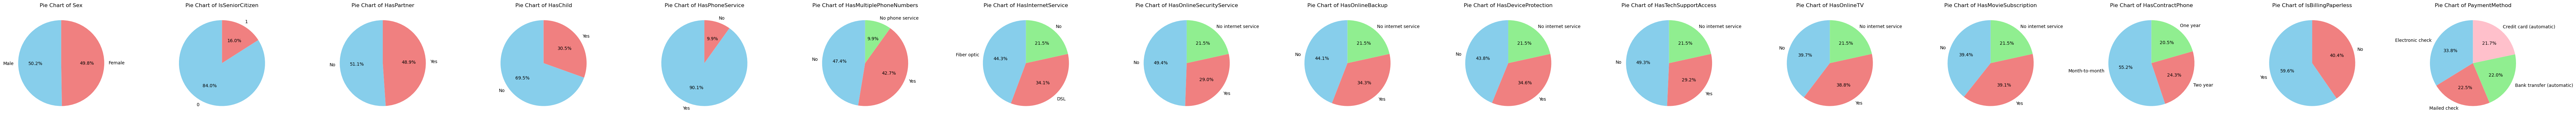

In [16]:
fig, axes = plt.subplots(1, len(cat_cols), figsize=(80, 6))

for i, col in enumerate(cat_cols):
    value_counts = data[col].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    colors = ['skyblue', 'lightcoral','lightgreen','pink']

    ax = axes[i]
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Pie Chart of {col}')

plt.tight_layout()
plt.show()

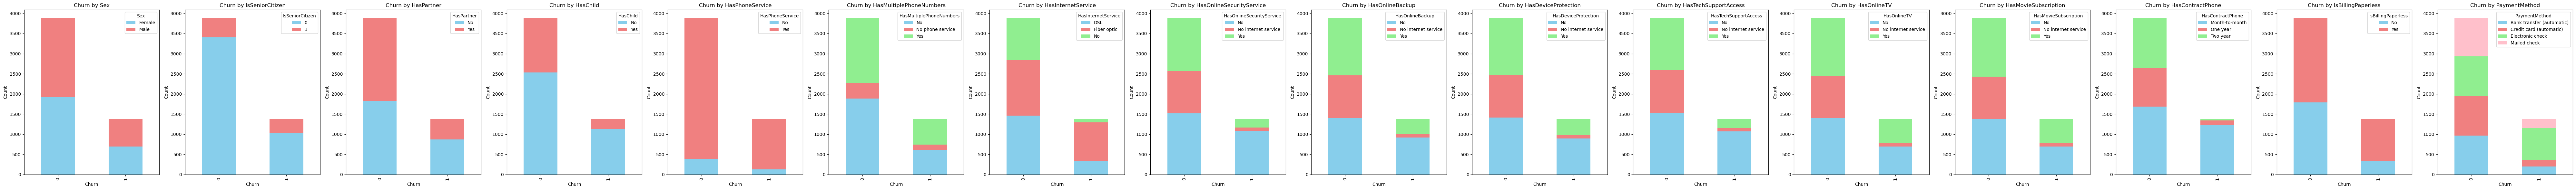

In [17]:
fig, axes = plt.subplots(1, len(cat_cols), figsize=(80, 6))

for i, col in enumerate(cat_cols):
    category_counts = data.groupby([col, 'Churn']).size().unstack().T
    colors = ['skyblue', 'lightcoral','lightgreen','pink']
    category_counts.plot(kind='bar', stacked=True, color=colors, ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

На вскидку можно выкинуть пол а так же ещё несколько признаков (если объединить No и No Internet в один), то я этого (пока?) делать не буду.

Так же подготовим train данные, но без визуализаций.

In [18]:
test['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
test['ClientPeriod'].fillna(data['ClientPeriod'].median(), inplace=True)
test['MonthlySpending'].fillna(data['MonthlySpending'].median(), inplace=True)
test['TotalSpent'] = data['TotalSpent'].fillna(data['ClientPeriod'] * data['MonthlySpending'])
test = test.drop_duplicates()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [19]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [20]:
target_col = 'Churn'

X_train, X_valid, y_train, y_valid = train_test_split(data.drop(columns=[target_col]), data[target_col], test_size=0.2, random_state=42)

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
    ])

model = make_pipeline(transformer, LogisticRegressionCV(
    Cs=[100, 10, 1, 0.1, 0.01, 0.001],
    cv=5,
    scoring='roc_auc',
    refit=True
))

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)
roc_auc = roc_auc_score(y_valid, y_pred)
print("ROC-AUC", roc_auc)

C:\Users\dmitr\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ROC-AUC 0.7145083397402548


0.7145 - такой себе результат, попробуем LogisticRegression вместо LogisticRegressionCV для max_iter и введём сетку параметров

In [21]:
target_col = 'Churn'

X_train, X_valid, y_train, y_valid = train_test_split(data.drop(columns=[target_col]), data[target_col], test_size=0.2, random_state=1)

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
    ])

classifier = make_pipeline(transformer, LogisticRegression(max_iter=100))
params_grid = {
    'logisticregression__penalty' : ['l1', 'l2', 'elasticnet'],
    'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'logisticregression__solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']
}
model = GridSearchCV(classifier, params_grid, cv=5, verbose=0, scoring='roc_auc', refit=True, n_jobs=-1)

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print("Best score:", round(model.best_score_,2))
print("Best parameters:", model.best_params_)

Best score: 0.84
Best parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}


C:\Users\dmitr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dmitr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmitr\anaconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dmitr\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.f

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Best score: 0.84
Best parameters: {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga'}

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [22]:
!pip install catboost
from catboost import CatBoostClassifier

In [23]:
model_cat = CatBoostClassifier(cat_features=cat_cols, verbose=0)
model_cat.fit(X_train, y_train)

y_pred = model_cat.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred)
print("ROC-AUC", roc_auc)

ROC-AUC 0.8677836858712166


Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

In [25]:
params_grid = {
    'depth': [2, 3, 4],
    'l2_leaf_reg': [0.1, 1, 5, 10],
    'subsample': [1, 3, 5],
    'n_estimators' : [100, 200, 300],
    'learning_rate': [0.1, 0.2, 0.3],
}
model = GridSearchCV(CatBoostClassifier(
            cat_features=cat_cols, verbose=0), params_grid, cv=5, verbose=0,
                     scoring='roc_auc', refit=True, n_jobs=8)

model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

print("Best score:", round(model.best_score_,2))
print("Best parameters:", model.best_params_)

C:\Users\dmitr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dmitr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dmitr\anaconda3\Lib\site-packages\catboost\core.py", line 5100, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\dmitr\anaconda3\Lib\site-packages\catboost\core.py", line 2

Best score: 0.84
Best parameters: {'depth': 3, 'l2_leaf_reg': 0.1, 'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 1}


Best score: 0.84
Best parameters: {'depth': 3, 'l2_leaf_reg': 0.1, 'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 1}

# Предсказания

In [35]:
best_model = CatBoostClassifier(cat_features=cat_cols, verbose=0, depth=3, l2_leaf_reg=0.1,
                                learning_rate=0.1, n_estimators=100, subsample=1)
best_model.fit(X_train, y_train)

y_pred = best_model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred)
print("ROC-AUC", roc_auc)

ROC-AUC 0.8746469751860075


In [36]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(test)[:,1]
submission.to_csv('./my_submission.csv')
roc_auc = roc_auc_score(y_valid, y_pred)
print(roc_auc)

0.8746469751860075


Лучшее решение отправьте в Stepik.

In [37]:
submission

Id     Churn
0        0  0.049843
1        1  0.643428
2        2  0.740444
3        3  0.016213
4        4  0.010248
...    ...       ...
1756  1756  0.119083
1757  1757  0.021528
1758  1758  0.738259
1759  1759  0.619849
1760  1760  0.021570

[1761 rows x 2 columns]